# Root finding, numerical integration and differentiation

In [46]:
# Import some libraries from python and set some defaults
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.image as mpimg
from matplotlib.ticker import MaxNLocator
import sys
import os
import time
sys.path.append(os.getcwd())
# from scipy.interpolate import CubicSpline
import pickle
import copy
from scipy import special
#set the font size for plots
plt.rcParams.update({'font.size': 17})
params = {'axes.labelsize': 16, 'axes.titlesize': 16}
plt.rcParams.update(params)
rc('animation', html='html5')
do_Test = False

In [1]:
from ipywidgets import widgets, interact, interactive, fixed
from ipywidgets import Button, HBox, VBox
import shelve
assessmentName="SC 5";
import os

def get_last_value(key):
    if os.path.isfile('.choices.shelve') or os.path.isfile('.choices.shelve.dir'):
        s=shelve.open('.choices.shelve')
        return s.get(key,None)
    return None

def make_value_change_fn(assessmentName,name):
    def fn(change):
        s=shelve.open('.choices.shelve')
        key='{0}_{1}'.format(assessmentName,name)
        s[key]=change['new']
        s.close()
    return fn
 
class myFloatBox:
    def __init__(self,name,description,long_description):
        self.name=name
        self.description=description
        self.long_description=long_description
    def getWidget(self):
        self.widgets=[ 
              widgets.FloatText(
              description=self.description,
        disabled=False,
                  value=get_last_value('{0}_{1}'.format(assessmentName,self.name))
        )]
        
        txt=widgets.HTMLMath(
            value=self.long_description,
            placeholder='',
            description='',
        )
        
        self.widget=VBox([txt]+self.widgets)
        self.widgets[0].observe(make_value_change_fn(assessmentName,self.name), names='value')

        return self.widget
    



# Preamble: workshop notebooks

Work through this notebook cell by cell.

When working on your solution, you can save the notebook as many times as you like. You can also submit 
as many times as you like. In fact, it is a good idea to save and submit often.

**Validate** the notebook before submitting. Use the *validate* button in the browser

**Do not copy or delete one of the original cells**. Doing so means you cannot validate the notebook.
If required, *create a new cell*, and copy the *contents* of another cell.


**Only the last submission before the deadline** will be marked.
Note that you have to **submit** at least once for your work to be marked.


Example of Simpson's rule, from https://pythonnumericalmethods.berkeley.edu/notebooks/chapter21.04-Simpsons-Rule.html


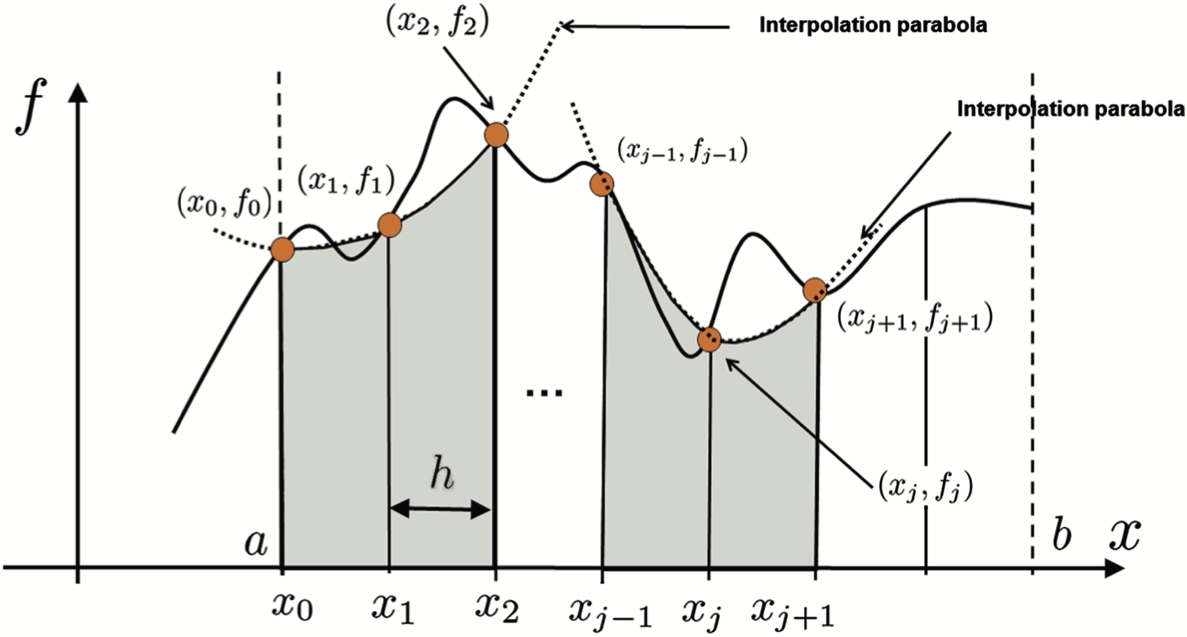


The notebook contains cells with code. Some of the code is (intentionally) missing. Please insert appropriate code below the line 'YOUR CODE HERE'. Cells which do not contain any 'YOUR CODE HERE' lines will allow you to test your code; if they return an error there is something wrong with your implementation; if they do not return an error your code might be correct (it is unfortunately not possible to check for every possible error).

Note:

simply add numerical value in a dropbox for it to get marked

when asked for true/false in a box:

ticking a box means True
not ticking (or ticking an even number of times) yields False


The notebook contains cells with code. Some of the code is (intentionally) missing. Please insert appropriate code where it says 'YOUR CODE HERE' and delete or comment out the 'raise NotImplementedError()' statements. Cells which do not contain any 'YOUR CODE HERE' lines will allow you to test your code; if they return an error there is something wrong with your implementation; if they do not return an error your code might be correct (it is unfortunately not possible to check for every possible error).

## Workshop V: Root finding, integration and differentiation

In this notebook we implement and test methods for numerical integration, namely the **Newton-Cotes**, **trapezoidal** and **Simpson** integration methods. 



# Part 1: Root finding


Given a function $f(x)$, root finding means finding one (or more) values $x$ for which $f(x)=0$ (up to some user-defined precision). This can be a very complicated undertaking, particualrly if there are many unknown roots, and in particualr if even the number of roots is unknown. This is typically the case in multiple dimensions (i.e when $x$ is a vector). Here, we will restrict ourselves to the 1 dimensional case.

We will implement three methods to find the zeroes of a given function. In all cases we would like to have the option to record intermediate estimates, for example to determine the rate of convergence of the method, or as a debugging option in case no roots are found. To do so, we will use a flag `returnPoints` to specify whether or not we want the list of values of $x$ tested so far (possible roots, $x_i$, $i=1\cdots N$), and the associated function evaluations, $f(x_i), i=1\cdots N$), to be returned. For example, if we found the final value of x and have the values of x stored in `xs` and the associated values $f(x_i)$ stored in `vs` (`v` for value), we can use this code snippet to determine what the function should return:

```
if returnPoints:
    return x,(xs,vs)
else:
    return x
```

The initial value(s) provided to the method should be included in `xs` and the corresponding value of the function in `vs`. The automatic testing cells below assume this is the case, returning an error if they are not included.

### 1) Newton-Raphson method

Implement the Newton-Raphson root finder in the cell below

In [48]:
class NotConverging(Exception):
    ''' This is an exception to be raised when there is no convergence.'''
    pass


def NewtonRaphson(f,df,x0,tolerance,returnPoints=False):
    '''
       Finds a root of the equation f(x)=0.
       Input:
       f: the function f(x) (must be a one-parameter python function)
       df: the derivative of f, df/dx (must be a one-parameter python function)
       x0: the starting value (starting guess) for the root finding (float)
       tolerance: the required absolute accuracy for the returned root (float)
       returnPoints: (bool) 
          if True, return the result and all intermeidate steps including the initial guess
          if False, return only the root 
       
       The function stops iterating when either
       
            | x_{i+1} - x_{i} | < tolerance
            
        and returns succesfully, or if the maximum number of 1000 iterations is reached, it
        returns the NotConverging exception.
    '''
    ### BEGIN SOLUTION ###
    nItermax = 1000  # maximum number of iterations
    nIter    = 0     # current number of iterations
    x        = x0    # current estimate of the root
    xs       = []    # list of roots tried
    vs       = []    # values f(x) for those roots
    while nIter<1000:
        xs.append(x)
        value=f(x)
        vs.append(value)
        if (len(xs)>1) and (abs(xs[-1]-xs[-2])<tolerance):
            # convergence reached: return
            if returnPoints:
                return x,(xs,vs)
            else:
                return x
        x      = x -f(x)/df(x)  # iterate to improve guess
        nIter +=1               # update number of iterations
    # no convergence reached: return exception
    raise NotConverging
    ### END SOLUTION

Root found is x=1.00 for which f(x)=0.0000, tolerance was 0.0010


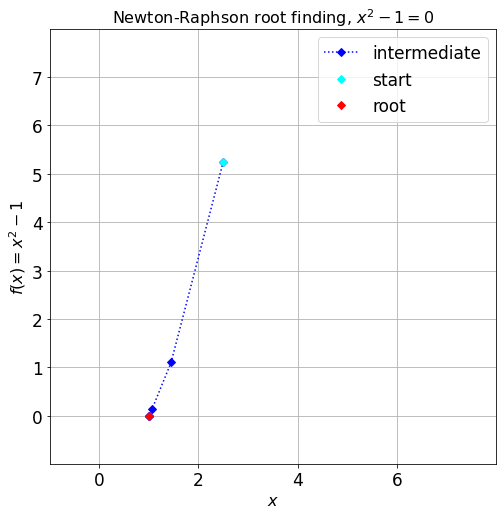

In [49]:
# Example test case: find root for the function f(x)=x^2-1

# definition of the function f(x)=x^2-1
def f(x):
    return np.array(x)**2-1.0
# corresponding derivative
def df(x):
    return 2.0*x

# initial guess, take x= 0.5
# required accuracy is acc = 1e-3
x_guess          = 2.5
acc              = 1e-3
ans              = NewtonRaphson(f,df,x_guess,acc,returnPoints=True)
x_root, (xs, vs) = ans

# Some feedback to the screen
feedback = r"Root found is x={0:1.2f} for which f(x)={1:1.4f}, tolerance was {2:1.4f}".format(x_root, f(x_root), acc)
print(feedback)

# plot result, including intermediate estimates of the roots
fig, ax = plt.subplots(1,1, figsize=(8, 8))

# plot the intermediate values
label = 'intermediate'
ax.plot(xs, vs, '-D', color='blue', linestyle='dotted', label=label)

# plot starting value
label = 'start'
ax.plot(x_guess, f(x_guess), 'D', color='cyan', label=label)

# plot the root
label = 'root'
ax.plot(x_root, f(x_root), 'D', color='red', label=label)

ax.legend()


ax.set_xlim([-0.99, 7.99])
ax.set_ylim([-0.99, 7.99])
ax.set_ylabel(r"$f(x)=x^2-1$")
ax.set_xlabel(r"$x$")
ax.title.set_text(r"Newton-Raphson root finding, $x^2-1=0$")
ax.grid(True)
fig.tight_layout
fig.show()

The cell below tests your implementation of the Newton-Raphson scheme.

It defines a new function to test whether your implementation correctly identifies the root.

** 5 marks **

In [50]:
# this tests the implementation of Newton-Raphson on another function
def f(x): return np.log(x)-np.pi 
def df(x): return 1.0/(x)

test1 = np.isclose(NewtonRaphson(f,df,0.1,1e-10),np.exp(np.pi))
x,(xs,vs)=NewtonRaphson(f,df,0.05,1e-3,returnPoints=True)
test2 = len(xs)==9 and len(vs)==9
if not (test1 and test2):
    print("There is an error in the NR implementation")
else:
    print("your implementation may be correct")
    
# assert np.isclose(NewtonRaphson(f,df,0.1,1e-10),np.exp(np.pi))
# x,(xs,vs)=NewtonRaphson(f,df,0.05,1e-3,returnPoints=True)
# assert len(xs)==9 and len(vs)==9

assert test1
assert test2

your implementation may be correct


### 2) Secant method

Implement the secant root finder method in the cell below

In [51]:
def secant(f,x0,x1,tolerance,returnPoints=False):
    '''
    finds a root of the equation f(x)=0, 
    Input:
       f: the function f(x) (must be a one-parameter python function)
       x0, x1: the starting values for the root finding (float)
       torerance: the integration tolerance (float)
       returnPoints: (bool) 
         if True, return the result and the steps, 
         if False, return only the result. 
       
    x0 and x1 are the first two guesses (x0 != x1). Starting from these, the
    method determines subsequent improved guesses, x2, x3, ...
    
    The termination condition is
    
    | (x_{i+1}-x{i})/(x_{i+1}+x_{i}) | < tolerance,
    
    where the x_{i+1} and x_{i} are the two last guesses.
    If the method fails to converge after 1000 steps, we bail out
    with a NotConverging exception
    
    '''
    ### BEGIN SOLUTION ###
    nIter=0
    xa=x0
    xb=x1
    xs=[xa]
    fa=f(xa)
    vs=[fa]
    fb=f(xb)
    while nIter<1000:
        xs.append(xb)
        vs.append(fb)
        if abs((xa-xb)/(xa+xb))<tolerance:
            if returnPoints:
                return xb,(xs,vs)
            else:
                return xb
        df=(fb-fa)/(xb-xa)
        xa=xb
        if df==0:
            raise ValueError
        xb=xb-fb/df
        fa=fb
        fb=f(xb)
        if np.isnan(fb):
            raise ValueError

    raise NotConverging
    ### END SOLUTION ###

Root found is x=1.00 for which f(x)=-0.0000, tolerance was 0.0010


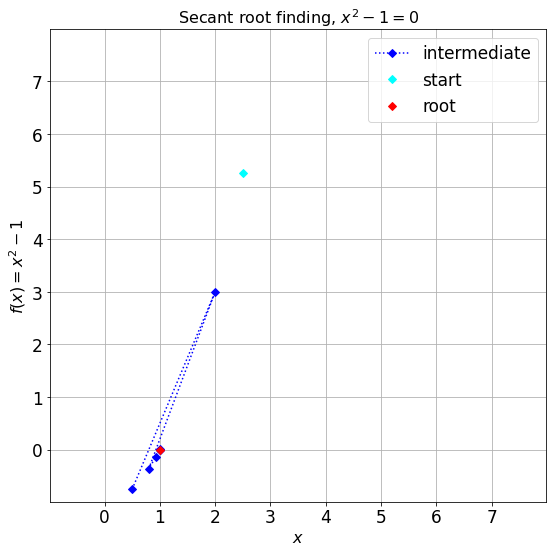

In [52]:
# Example test case: find root for the function f(x)=x^2-1

# definition of the function f(x)=x^2-1
def f(x):
    return np.array(x)**2-1.0
# corresponding derivative
def df(x):
    return 2.0*x

# initial guess, take x= 0.5
# required accuracy is acc = 1e-3
x_guess          = 2.5
x0               = 0.5
x1               = 2.0
acc              = 1e-3
ans              = secant(f, x0, x1, acc, returnPoints=True)
x_root, (xs, vs) = ans

# Some feedback to the screen
feedback = r"Root found is x={0:1.2f} for which f(x)={1:1.4f}, tolerance was {2:1.4f}".format(x_root, f(x_root), acc)
print(feedback)

# plot result, including intermediate estimates of the roots
fig, ax = plt.subplots(1,1, figsize=(8, 8))

# plot the intermediate values
label = 'intermediate'
ax.plot(xs, vs, '-D', color='blue', linestyle='dotted', label=label)

# plot starting value
label = 'start'
ax.plot(x_guess, f(x_guess), 'D', color='cyan', label=label)

# plot the root
label = 'root'
ax.plot(x_root, f(x_root), 'D', color='red', label=label)

ax.legend()
ax.set_xlim([-0.99, 7.99])
ax.set_ylim([-0.99, 7.99])
ax.set_ylabel(r"$f(x)=x^2-1$")
ax.set_xlabel(r"$x$")
ax.title.set_text(r"Secant root finding, $x^2-1=0$")
ax.grid(True)
fig.tight_layout()
fig.show()

The cell below tests your implementation of the secant method.

** 5 marks **

In [53]:
# this tests the implementation of secant root finder on another function
def f(x): return np.exp(x)-np.pi 
def df(x): return np.exp(x)

assert np.isclose(secant(f,0,2,1e-10),np.log(np.pi))
x,(xs,vs)=secant(f,0,2,1e-3,returnPoints=True)
assert len(xs)==8 and len(vs)==8

test1 = np.isclose(secant(f,0,2,1e-10),np.log(np.pi))
x,(xs,vs)=secant(f,0,2,1e-3,returnPoints=True)
test2 =  len(xs)==8 and len(vs)==8

if not (test1 and test2):
    print("There is an error in the secant implementation")
else:
    print("your implementation may be correct")

assert test1
assert test2


your implementation may be correct


### 3) Bisection method

Implement the bisection root finder method in the cell below

In [54]:
def bisect(f, x0, x1, tolerance, returnPoints=False):
    '''
    finds a root of the equation f(x)=0. 
    
    Input:
       f: the function f(x) (must be a one-parameter python function)
       x0, x1: guess that should straddle a root (float)
       torerance: the integration tolerance (float)
       returnPoints: (bool) 
          if True, return the result and the steps, 
          if False, return only the result. 
       
    x0 and x1 are the first two guesses.
    They need to **straddle** a root, meaning f(x0)*f(x1)<0.
 
    It should not matter which one corresponds to a positive 
    value of f. 
    
    The iteration terminates when the length of the interval
    between the two last estimates is smaller than the tolerance,
    
    | x_{i+1} - x_{i} | < tolerance
    
    When this condition is satisfied, the function should return
    
    x_{i+2} = (x_{i+1}-x{i}) / 2
     
     
   The list of returned points should not include x0 or x1.

    '''
    ### BEGIN SOLUTION ###
    nIter=0
    f0=f(x0)
    f1=f(x1)
    if f0*f1>0:
        print(f0,f1)
        raise NotConverging
    if f0>0:
        xpos=x0
        xneg=x1
    else:
        xpos=x1
        xneg=x0        
    xs=[]
    vs=[]
    while nIter<10000:
        xnew=(xpos+xneg)/2
        fnew=f(xnew)
        # print(xpos,xneg,xnew)
        # print(f(xpos),f(xneg),f(xnew))
        xs.append(xnew)
        vs.append(fnew)
        if abs(xpos-xneg)<tolerance:
            if returnPoints:
                return xnew,(xs,vs)
            else:
                return xnew
        if fnew>0:
            xpos=xnew
        else:
            xneg=xnew
    ### END SOLUTION ###

Root found is x=1.00 for which f(x)=-0.0002, tolerance was 0.0010


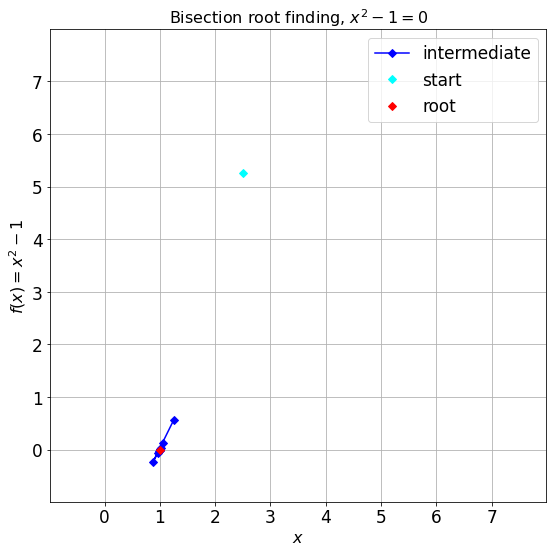

In [55]:
# Example test case: find root for the function f(x)=x^2-1

# definition of the function f(x)=x^2-1
def f(x):
    return np.array(x)**2-1.0
# corresponding derivative
def df(x):
    return 2.0*x

# initial guess, take x= 0.5
# required accuracy is acc = 1e-3
x_guess          = 2.5
x0               = 0.5
x1               = 2.0
acc              = 1e-3
ans              = secant(f, x0, x1, acc, returnPoints=True)
ans              = bisect(f, x0, x1, acc, returnPoints=True)
x_root, (xs, vs) = ans

# Some feedback to the screen
feedback = r"Root found is x={0:1.2f} for which f(x)={1:1.4f}, tolerance was {2:1.4f}".format(x_root, f(x_root), acc)
print(feedback)

# plot result, including intermediate estimates of the roots
fig, ax = plt.subplots(1,1, figsize=(8, 8))

# plot the intermediate values
label = 'intermediate'
ax.plot(xs, vs, '-D', color='blue', label=label)

# plot starting value
label = 'start'
ax.plot(x_guess, f(x_guess), 'D', color='cyan', label=label)

# plot the root
label = 'root'
ax.plot(x_root, f(x_root), 'D', color='red', label=label)

ax.legend()
ax.set_xlim([-0.99, 7.99])
ax.set_ylim([-0.99, 7.99])
ax.set_ylabel(r"$f(x)=x^2-1$")
ax.set_xlabel(r"$x$")
ax.title.set_text(r"Bisection root finding, $x^2-1=0$")
ax.grid(True)
fig.tight_layout()
fig.show()

The cell below tests your implementation of the bisection method.

** 5 marks **

In [56]:
# this tests the implementation of bisection root finding on another function
def f(x): return np.cos(x)-np.sin(x) 
def df(x): return -np.sin(x)-np.cos(x)

# assert np.isclose(bisect(f,0,2,1e-10),np.pi/4)
# x,(xs,vs)=bisect(f,0,2,1e-3,returnPoints=True)
# assert len(xs)==12 and len(vs)==12

test1 = np.isclose(bisect(f,0,2,1e-10),np.pi/4)
x,(xs,vs)=bisect(f,0,2,1e-3,returnPoints=True)
test2 = len(xs)==12 and len(vs)==12

if not (test1 and test2):
    print("There is an error in the bisection implementation")
else:
    print("your implementation may be correct")

assert test1
assert test2

your implementation may be correct


### Finding the roots of an (unknown) function with more than one root

The hidden cell below defines a function f(x), and plots it over a given range in x.
Compute the first three roots of f(x) to 8 significant figures.

Enter your answers in the boxes below, in increasing order. The boxes will appear when you run the hidden cells below.


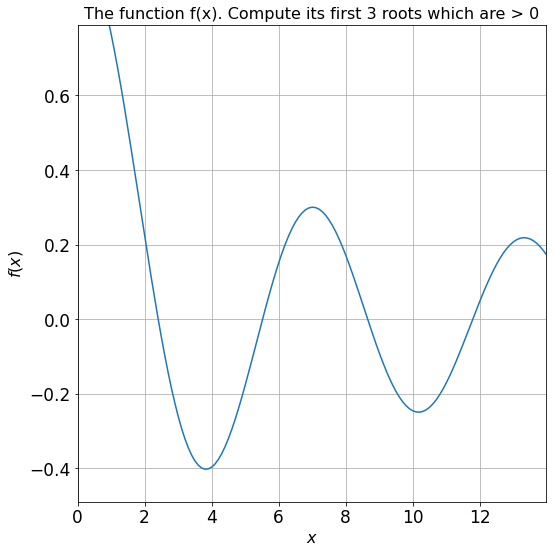

In [57]:
def f(x):
    return special.jv(0,x)

x = np.arange(0,100,0.1)    
fig, ax = plt.subplots(1,1, figsize=(8, 8))

ax.plot(x,f(x))

ax.set_xlim([0, 13.99])
ax.set_ylim([-0.49, 0.79])
ax.set_ylabel(r"$f(x)$")
ax.set_xlabel(r"$x$")
ax.title.set_text(r"The function f(x). Compute its first 3 roots which are > 0")
ax.grid(True)
fig.tight_layout()
fig.show()




 roots found using bisection [2.4048255383968353, 5.520078107714653, 8.653727933764458]
 zeros of the special bessel function - roots found as test:  [ 1.92989376e-08  2.57165755e-09 -2.08534452e-08]


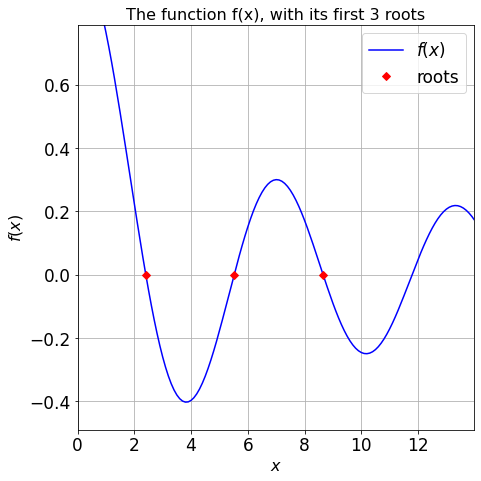

In [58]:
# Use this cell to implement your solution
### BEGIN SOLUTION ###
# We use bisection to obtain the answer
def f(x):
    return special.jv(0,x)
x = np.arange(0,100,0.1)

# We re-define the functions here for use when generating answers
def MyNewtonRaphson(f,df,x0,tolerance,returnPoints=False):
    '''
       Finds a root of the equation f(x)=0.
       Input:
       f: the function f(x) (must be a one-parameter python function)
       df: the derivative of f, df/dx (must be a one-parameter python function)
       x0: the starting value (starting guess) for the root finding (float)
       tolerance: the integration tolerance (float)
       returnPoints: (bool) if True, return the result and the steps, 
       if False, return only the result. 
       
       The function stops iterating when either
       
            | x_{i+1} - x_{i} | < tolerance
            
        and returns succesfully, or if the maximum number of 1000 iterations is reached, it
        returns the NotConverging exception.
    '''
    nItermax = 1000  # maximum number of iterations
    nIter    = 0     # current number of iterations
    x        = x0    # current estimate of the root
    xs       = []    # list of roots tried
    vs       = []    # values f(x) for those roots
    while nIter<1000:
        xs.append(x)
        value=f(x)
        vs.append(value)
        if (len(xs)>1) and (abs(xs[-1]-xs[-2])<tolerance):
            # convergence reached: return
            if returnPoints:
                return x,(xs,vs)
            else:
                return x
        x      = x - f(x)/df(x)  # iterate to improve guess
        nIter +=1                # update number of iterations
    # no convergence reached: return exception
    raise NotConverging

    
def MyBisect(f, x0, x1, tolerance, returnPoints=False):
    '''
    finds a root of the equation f(x)=0. 
    x0 and x1 are the first two guesses.
    They need to **straddle** a root, meaning f(x0)*f(x1)<0.
 
    It should not matter which one corresponds to a positive 
    value of f. 
    
    The iteration terminates when the length of the interval
    between the two last estimates is smaller than the tolerance,
    
    | x_{i+1} - x_{i} | < tolerance
    
    When this condition is satisfied, the function should return
    
    x_{i+2} = (x_{i+1}-x{i}) / 2
     
     
   The list of returned points should not include x0 or x1.

    '''
    nIter=0
    f0=f(x0)
    f1=f(x1)
    if f0*f1>0:
        print(f0,f1)
        raise NotConverging
    if f0>0:
        xpos=x0
        xneg=x1
    else:
        xpos=x1
        xneg=x0        
    xs=[]
    vs=[]
    while nIter<10000:
        xnew=(xpos+xneg)/2
        fnew=f(xnew)
        # print(xpos,xneg,xnew)
        # print(f(xpos),f(xneg),f(xnew))
        xs.append(xnew)
        vs.append(fnew)
        if abs(xpos-xneg)<tolerance:
            if returnPoints:
                return xnew,(xs,vs)
            else:
                return xnew
        if fnew>0:
            xpos=xnew
        else:
            xneg=xnew
            
def MySecant(f,x0,x1,tolerance,returnPoints=False):
    '''
    finds a root of the equation f(x)=0, 
    Input:
       f: the function f(x) (must be a one-parameter python function)
       x0, x1: the starting values for the root finding (float)
       torerance: the integration tolerance (float)
       returnPoints: (bool) if True, return the result and the steps, 
       if False, return only the result. 
       
    x0 and x1 are the first two guesses (x0 != x1). Starting from these, the
    method determines subsequent improved guesses, x2, x3, ...
    
    The termination condition is
    
    | (x_{i+1}-x{i})/(x_{i+1}+x_{i}) | < tolerance,
    
    where the x_{i+1} and x_{i} are the two last guesses.
    If the method fails to converge after 1000 steps, we bail out
    with a NotConverging exception
    
    '''
    nIter=0
    xa=x0
    xb=x1
    xs=[xa]
    fa=f(xa)
    vs=[fa]
    fb=f(xb)
    while nIter<1000:
        xs.append(xb)
        vs.append(fb)
        if abs((xa-xb)/(xa+xb))<tolerance:
            if returnPoints:
                return xb,(xs,vs)
            else:
                return xb
        df=(fb-fa)/(xb-xa)
        xa=xb
        if df==0:
            raise ValueError
        xb=xb-fb/df
        fa=fb
        fb=f(xb)
        if np.isnan(fb):
            raise ValueError

    raise NotConverging
      
# Our solution uses bi-section
xlow    = [1., 3., 6.]
xhigh   = [3., 6., 9.]
myroots = []
for x0,x1 in zip(xlow, xhigh):
    myroots.append(MyBisect(f, x0, x1, 1e-7))

# print bisection answer, and compare to known zeros of bessel function    
print(" roots found using bisection" , myroots)
# roots are [2.4048255383968353, 5.520078107714653, 8.653727933764458]
print(" zeros of the special bessel function - roots found as test: ", special.jn_zeros(0,3)-myroots)

# redo plot and overplot the roots
fig, ax = plt.subplots(1,1, figsize=(7, 7))

ax.plot(x,f(x),label=r"$f(x)$", color='blue')
ax.plot(myroots, np.zeros_like(myroots), 'D', color='red', label='roots')
ax.set_xlim([0, 13.99])
ax.set_ylim([-0.49, 0.79])
ax.set_ylabel(r"$f(x)$")
ax.set_xlabel(r"$x$")
ax.legend()
ax.title.set_text(r"The function f(x), with its first 3 roots")
ax.grid(True)
fig.tight_layout()
fig.show()
### END SOLUTION ###



Enter your answers in the boxes below. If the boxes do not appear, then exceute the hidden cells below, which should make them appear.


In [2]:
import mywidgets
root1=mywidgets.myFloatBox('root','q1','Root 1 = ','First root. (Specify the answer to 8 significant digits)')
root1.getWidget()

In [3]:
root2=mywidgets.myFloatBox('root','q2','Root 2 = ','Second root. (Specify the answer to 8 significant digits)')
root2.getWidget()

In [4]:
root3=mywidgets.myFloatBox('root','q3','Root 3 = ','Third root. (Specify the answer to 8 significant digits)')
root3.getWidget()

In [62]:
### BEGIN HIDDEN TESTS ###
roots    = np.array([2.4048255383968353, 5.520078107714653, 8.653727933764458])               # my answer
answers  = np.array([root1.widgets[0].value, root2.widgets[0].value, root3.widgets[0].value]) # student's answer
accuracy =  np.abs(roots-answers)/roots * 1e6 # relative accuracy
assert np.all(np.isclose(accuracy,0,atol=1))
### END HIDDEN TESTS ###


## Testing the rate of convergence of root finders

We test the rate at which the three methods converge by finding the zeroes of the function  f(x)=x−tanh(2x). The first few cells below illustrate the method. Run them to see what happens. Next you will be asked to examine the convergence for a different function.

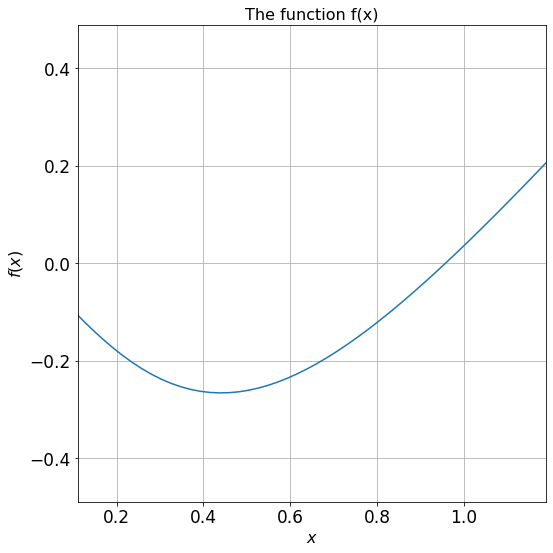

In [63]:
# define the function and compute its derivative
def f(x): 
    return x-np.tanh(2*x)
def df(x): 
    return 1.0-2.0/np.cosh(2*x)**2

# plot the function
fig, ax = plt.subplots(1,1, figsize=(8, 8))
xmin,xmax =0.1, 1.2
xs=np.linspace(xmin,xmax,50)
ax.plot(xs,f(xs))

#ax.plot.hlines(0,xmin,xmax)
ax.set_xlim([0.11,1.19])
ax.set_ylim([-0.49, 0.49])
ax.set_ylabel(r"$f(x)$")
ax.set_xlabel(r"$x$")
ax.title.set_text(r"The function f(x)")
ax.grid(True)
fig.tight_layout()
fig.show()



We now use all three methods to find the root that is > 0. We also plot the relative error versus the iteration count (the number of function evaluations), to examine the rate of convergence

We also examine the **golden ratio** prediction for the Secant method.


These are the roots we find, and the number of iterations to obtain it
Newton-Rapshon, root = 0.95750402, number of iterations = 6
Secant, root = 0.95750402, number of iterations = 8
Bisection, root = 0.95750402, number of iterations = 34
0 -0.3396050816480975 -0.6152954638619361
1 -0.6152954638619361 -1.128709333296091
2 -1.128709333296091 -2.2590581392852283
3 -2.2590581392852283 -3.747925310248441
4 -3.747925310248441 -6.42098923036703
5 -6.42098923036703 -10.58675880823705
6 -10.58675880823705 -inf


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:131: RuntimeWarning: divide by zero encountered in log10
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:135: RuntimeWarning: divide by zero encountered in log10
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:137: RuntimeWarning: divide by zero encountered in log10


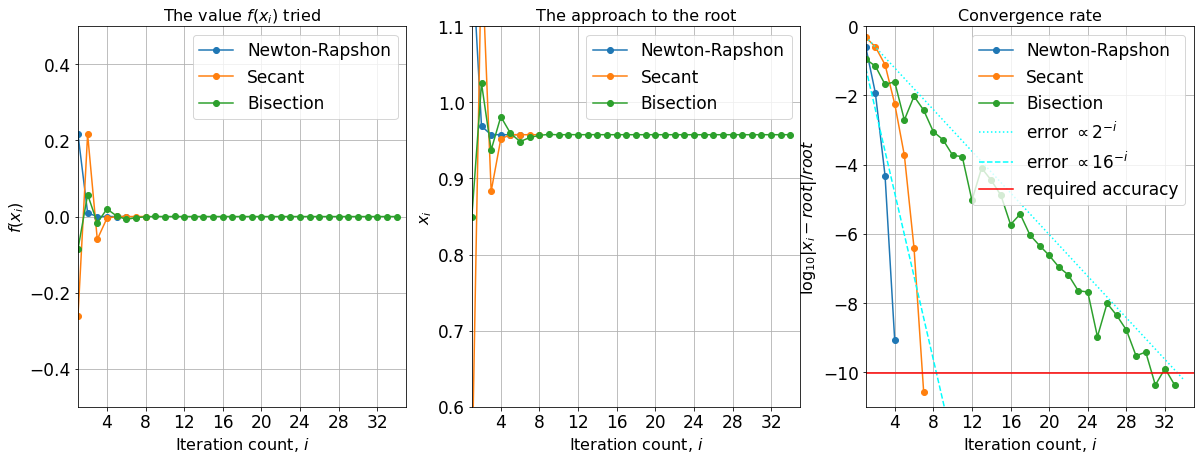

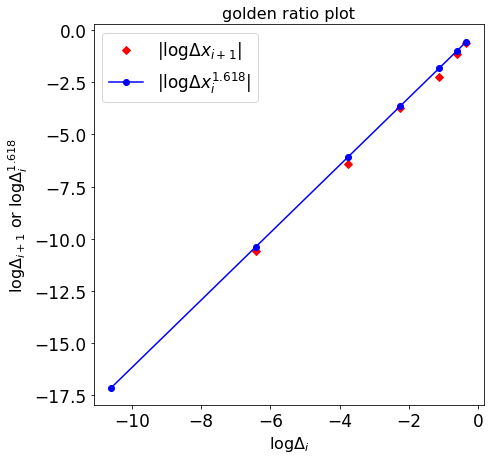

In [64]:
def f(x): 
    return x-np.tanh(2*x)
def df(x): 
    return 1.0-2.0/np.cosh(2*x)**2

# Make two figures
# Figure 1:
# Figure 1 is a three panel plot
# For each of the methods (Newton-Raphson, secant & bisection), plot the following
# panel (a): iteration count, i, vs f(x_i)
# panel (b): iteration count, i, vs x_i
# panel (c): iteration count, i, vs log_10(|x_i-root|)
#    where root is the root found by this method
#    use a legend to distinguish between the methods, and add labels
#    the approach to convergence of panel(c) was discussed in the lecture notes, it is
#      overplot in cyan lines that approximately fit the convergence rate for each

# Figure 2:
# make a single panel plot, to verify the "golden ratio" expression that characterises
#   convergence in the case of the Secant method


# approximate marking scheme
# Figure 1: 6 marks
#    each plot has labels and a legend    : 2 marks
#    the curves look OK                   : 2 marks
#    convergence curves are overplotted   : 2 marks

# Figure 2: 4 marks
#   panel has axes labels and a legend         : 2 marks
#   panel demonstrates the golden ratio scaling: 2 marks

# Create figure 1
### BEGIN SOLUTION ###

fig, ax = plt.subplots(1,3, figsize=(20, 7))
methods = ['Newton-Rapshon', 'Secant', 'Bisection']
panels  = np.arange(len(methods))

for (panel, method) in zip(panels, methods):
    ax[panel].set_xlim([0, 20])
    ax[panel].xaxis.set_major_locator(MaxNLocator(integer=True))
    # panel=0: plot the function itself
    if (panel == 0):
        ax[panel].set_ylim([-0.5, 0.5])
        ax[panel].set_ylabel(r"$f(x_i)$")
        ax[panel].title.set_text(r"The value $f(x_i)$ tried")
    # panel=1: plot the root
    elif (panel == 1):
        ax[panel].set_ylim([0.6, 1.1])
        ax[panel].set_ylabel(r"$x_i$")
        ax[panel].title.set_text(r"The approach to the root")
    else:
        ax[panel].set_ylim([-10, 0.])
        ax[panel].set_ylabel(r"$\log_{10} |x_i-root|/root$")
        ax[panel].title.set_text(r"Convergence rate")        
    ax[panel].set_xlabel(r"Iteration count, $i$")
    ax[panel].grid(True)

print("These are the roots we find, and the number of iterations to obtain it")
for method in methods:
    if(method == methods[0]):
        x,(xs,vs)=MyNewtonRaphson(f,df, 1.2, 1e-10,returnPoints=True)
    if(method == methods[1]):
        x,(xs,vs)=MySecant(f,0.5, 1.2, 1e-10, returnPoints=True)
    if(method == methods[2]):
        x,(xs,vs)=MyBisect(f,0.5, 1.2, 1e-10, returnPoints=True)

    # plot function value for successive roots
    xs    = np.array(xs)
    vs    = np.array(vs)
    count = 1 + np.arange(0, len(xs), 1)
    
    # function value
    ax[0].plot(count, vs, marker = 'o', ls = '-', label=method)
    
    # root
    ax[1].plot(count, xs, marker = 'o', ls = '-', label=method)
    
    # relative accuracy
    target=xs[-1]
    info  = r"{0:s}, root = {1:0.8f}, number of iterations = {2:d}".format(method, target, len(xs))
    print(info)
    reldiff=abs((xs-target)/target)
    mask = np.where(reldiff > 0)[0].astype(np.int32)
    ax[2].plot(count[mask], np.log10(reldiff[mask]), marker = 'o', ls = '-', label=method)

# plot error scaling
ax[2].plot(count, np.log10((1./2.)**(count)),  color='cyan', linestyle='dotted',    label=r"error $\propto 2^{-i}$")
ax[2].plot(count, np.log10((1./16)**(count)),  color='cyan', linestyle='dashed',    label=r"error $\propto 16^{-i}$")
# ax[2].plot(count, np.log10((1./8.)**(count)),  color='cyan', linestyle='dashdot',   label=r"error $\propto 2^{-2i}$")
    
#
ax[2].set_ylim([-11,0])

#
rtolerance = np.log10(1e-10 * xs[-1])
ax[2].axhline(rtolerance, color='red', label='required accuracy')
for panel in panels: 
    ax[panel].legend()
    ax[panel].set_xlim([1, 35])
    
    
### END SOLUTION ###


fig.show()

# Notice from the plot that the way the iteration is stopped in the Newton-Raphson solver, 
#     we would need to perform one iteration more
# Also compare the convergence rate with the expectation depending on the size of the interval (see the cyan curves)



# Figure 2: 
#    plot log_10|Delta x_i| vs log_10|Delta x_{i+1}| for the secant method
#    compare to the "golden ratio" prediction, |Delta x_{i+1}| proportional to |Delta x_i|^{1.618}
fig, ax = plt.subplots(1,1, figsize=(7, 7))

### BEGIN SOLUTION ###

# plot golden ratio for Secant method
x,(xs,vs) = MySecant(f,0.5, 1.2, 1e-10, returnPoints=True)
root     = xs[-1]
deltaxs  = np.abs(np.array(x - xs))
indexes  = np.arange(len(deltaxs))
label    = r"$|\log\Delta x_{i+1}|$"
for (deltax, index) in zip(deltaxs, indexes):
    if(index < (len(deltaxs)-1)):
        deltax_plus = deltaxs[index+1]
        print(index, np.log10(deltax), np.log10(deltax_plus))
        if(index == 0):
            ax.plot(np.log10(deltax), np.log10(deltax_plus), 'D', color='red', label=label)
        else:
            ax.plot(np.log10(deltax), np.log10(deltax_plus), 'D', color='red')
label =   r"$|\log\Delta x_{i}^{1.618}|$"      
ax.plot(np.log10(deltaxs), np.log10(deltaxs**(1.618)), '-o', color='blue', label=label)
ax.set_xlabel(r"$\log\Delta_{i}$")
ax.set_ylabel(r"$\log\Delta_{i+1}$ or $\log\Delta_{i}^{1.618}$")
title = "golden ratio plot"
ax.legend()
ax.title.set_text(title)
plt.show()

### END SOLUTION ###

The function $f(x)=x^5-3x^2+3$ has a root near $x=0.8$. Use the Newton-Raphson scheme to find the root,
starting from the guess $x=-0.1$. 

Determine the required minimum number of iterations, $i$, (evaluations of $f(x_i)$), so that $|f(x_i)|<10^{-6}$.

Use the cell below the implement your test

**5 marks **



 number of iterations =  12


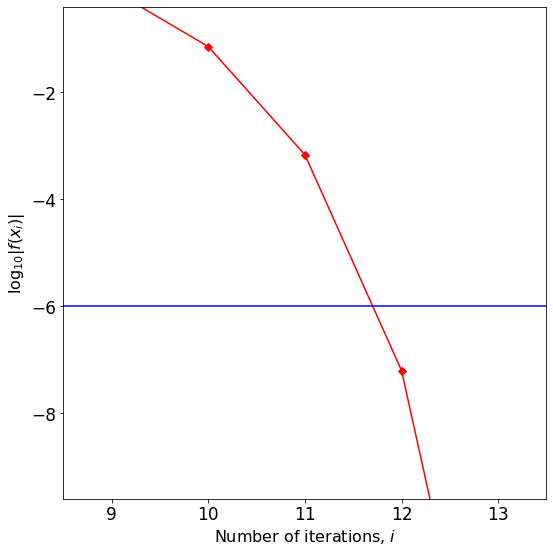

In [32]:
# Use this cell to compute the answer

### BEGIN SOLUTION ###
def f(x):
    return x**5 - 3*x**2 + 3
def df(x):
    return 5*x**4 - 6*x

x0  = -0.1
acc = 5e-7


x,(xs,vs)= MyNewtonRaphson(f,df,x0,acc,returnPoints=True)
count    = 1 + np.arange(len(xs))


fig, ax = plt.subplots(1,1, figsize=(8, 8))
target = xs[-1]
# error  = np.log10(np.abs( (np.array(xs)-target)/target ))
error = np.log10(np.abs(f(np.array(xs))))
ax.plot(count, error, '-D', color='red')
ax.set_xlabel(r"Number of iterations, $i$")
ax.set_ylabel(r"$\log_{10} |f(x_i)|$")
ax.set_xlim([8.5, 13.5])
ax.set_ylim([-9.6, -0.4])
mask = error < -6
ax.axhline(y=-6, color='blue')
print(" number of iterations = ", count[mask][0])
fig.tight_layout()
fig.show()
### END SOLUTION

Enter your answer in the box below. If the box does not appear, excute the hidden cell to make it appear.

In [5]:
from IPython.display import display, HTML
display(HTML('<hr>'))
# def f2(x): return x**5-3*x**2+3
# def df2(x):return 5*x**4-6*x
# x,(xs,vs)=NewtonRaphson(f2,df2,-0.1,1e-6,returnPoints=True)
# print(" number of evaluations = ", len(xs)-1, " root = ", xs[-1])
# print(" trial roots: ", xs)
# print(" function values: ", vs)
# # plot the function
# fig, ax = plt.subplots(1,1, figsize=(7, 7))
# xt = np.arange(-1,0.5,0.01)
# ax.plot(xt, f2(xt), label=r"$f(x)$")
# ax.plot(x, f2(x), 'D', color='red', label='root')
# ax.set_xlim([-1, -0.8])
# ax.set_ylim([-0.5, 0.5])
# fig.show()
# myanswer = 12
import mywidgets
intwidget=mywidgets.myIntBox('root','q4','Number=','Number of iterations to find a zero with tolerance $10^{-6}$ using the initial guess $x=-0.1$')
intwidget.getWidget()

In [34]:
### BEGIN HIDDEN TESTS ###
myanswer = 12
assert intwidget.widgets[0].value==myanswer
### END HIDDEN TESTS ###

AssertionError: 

Examine root finding for the function $f(x)=x^3+3x^2+x+1$ to answer the question below.

Use the cell below to find the answers, the write your answer in the box below.


**5 marks**

In [6]:
import mywidgets
mcb=mywidgets.myCheckBoxSet('root','q5',
    "Next we consider the function $f(x)=x^3+3x^2+x+1$," 
                            "which of the following statements are true for a tolerance of $10^{-6}$?",[
    "The Newton-Raphson method converges for $x_0=0$ in less than 10 iterations",
    "The Newton-Raphson method converges faster for $x_0=-3$ than for $x_0=-2$",
    "The secant method is quicker than the bisection method with $x_0=-3$ and $x_1=-2$"
])
mcb.getWidget()

In [36]:
# Use this cell to answer the questions
### BEGIN SOLUTION ###
def f(x):
    return x**3 + 3*x**2 + x + 1
def df(x):
    return 3*x**2 + 6*x + 1

x0  = 0
acc = 1e-6
# test Newton-Raphson
for xtry in [0, -2, -3]:
    try: 
        x, (xs, vs)       = MyNewtonRaphson(f,df,xtry,acc,returnPoints=True)
        print("NR converge for x0={0:2.1f} in {1:d} steps".format(xtry, len(vs)))
    except NotConverging:
        print("NR does not converge for x0={0:2.1f}".format(xtry))
        
# test secant
try:
    xa = -3
    xb = -2
    x, (xs, vs) = MySecant(f, xa, xb, acc, returnPoints=True)
    print("S converges for xa={0:2.1f} and xb={1:2.1f} in {2:d} steps".format(xa, xb, len(vs)))
except NotConverging:
    print("S does not converge")
# test Bisection
try:
    xa = -3
    xb = -2
    x, (xs, vs) = MyBisect(f, xa, xb, acc, returnPoints=True)
    print("B converges for xa={0:2.1f} and xb={1:2.1f} in {2:d} steps".format(xa, xb, len(vs)))
except NotConverging:
    print("B does not converge")
    
### END SOLUTION

NR does not converge for x0=0.0
NR converge for x0=-2.0 in 9 steps
NR converge for x0=-3.0 in 5 steps
S converges for xa=-3.0 and xb=-2.0 in 9 steps
B converges for xa=-3.0 and xb=-2.0 in 21 steps


In [37]:
from IPython.display import display, HTML
display(HTML('<hr>'))
### BEGIN HIDDEN TESTS ###
# def f3(x): return x**3+3*x**2+x+1
# def df3(x): return 3*x**2+6*x +1
# print("sec: ",len(secant(f3,-3,-2,1e-6,returnPoints=True)[1][0]))
# print("bis: ",len(bisect(f3,-3,-2,1e-6,returnPoints=True)[1][0]))
# print("NR x0=-3: ",len(NewtonRaphson(f3,df3,-3,1e-6,returnPoints=True)[1][0]))
# print("NR x0=-2: ",len(NewtonRaphson(f3,df3,-2,1e-6,returnPoints=True)[1][0]))
# try :
#    NewtonRaphson(f3,df3,0.0,1e-6,returnPoints=True)
# except NotConverging:
#    print ("not converging indeed!")
assert mcb.widgets[0].value in [None,False]
assert mcb.widgets[1].value in [True]
assert mcb.widgets[2].value in [True]

### END HIDDEN TESTS ###

AssertionError: 

## Root finding when there are many roots

So far we have plotted the function to find starting points for root finding. This is not always practical: consider the case where in a larger calculation you need to find roots of a function, however the function changes during the calculation (for example it depends on a parameter that changes during the calculation). Another case is where the function has very many roots. There is no general way of finding the root(s) in such cases. However, suppose you know the interval in which you are looking for roots, say the interval $[0,1]$. We could split-up this interval in smaller intervals, find a root in each interval, and collect all the roots. We could then redo the calculation with smaller intervals. If we find the same set of roots, maybe we found all of them.

Write your answer in the boxes. If the boxes do not appear, run the hidden cells below here to make them appear.

In [7]:
# Here we define the function f(x)
def f(x):
    return special.jv(1,x)

In [8]:
import mywidgets
intwidget6 = mywidgets.myIntBox('root','q6','Number=','Enter the number of roots in interval ]0,44[')
intwidget6.getWidget()


In [9]:
root6=mywidgets.myFloatBox('root','q7','Root = ',
                           'Largest root in this interval (Specify the answer to 5 significant digits)')
root6.getWidget()

 number of roots in the interval ]0,44[ = 13
 Largest root is 41.61709421


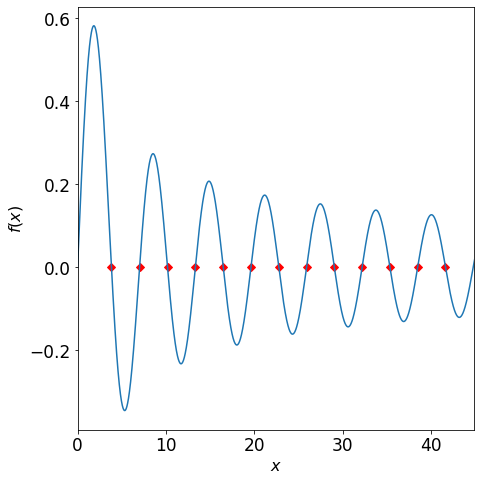

In [42]:
# Use this cell to obtain the answers to the questions above

### BEGIN SOLUTION ###
# these are the roots
roots = special.jn_zeros(1,13)

# now find the roots using bisection
intervals = np.array(np.arange(0,44,0.01))
indexes   = np.array(np.arange(len(intervals)))
lefts     = []
rights    = []
for index in indexes[1:-1]:
    lefts.append(intervals[index])
    rights.append(intervals[index+1])

rfound = []
acc    = 1e-6
for (left, right) in zip(lefts, rights):
    f1 = f(left)
    f2 = f(right)
    if (f1 == 0):
        rfound.append(left)
    if (f2 == 0):
        rfound.append(right)
    if (f1 * f2 < 0):
        found = MyBisect(f, left, right, acc, returnPoints=False)        
        rfound.append(found)

#
print(" number of roots in the interval ]0,44[ = {0:d}".format(len(roots)))    
print(" Largest root is {0:1.8f}".format(roots[-1]))

fig, ax = plt.subplots(1,1, figsize=(7, 7))
x       = np.array(np.arange(0, 50, 0.01))
ax.plot(roots, f(roots), 'D', color='red')
#ax.plot(rfound, f(rfound)+0.1, 'o', color='blue')
ax.plot(x, f(x))
ax.set_xlim([0,44.9])
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$f(x)$")
fig.tight_layout()
fig.show()
### END SOLUTION ###


In [43]:
### BEGIN HIDDEN TESTS ###
# My answers
Nroot = 13
Lroot = 41.61709421
Nstudent = intwidget6.widgets[0].value
Lstudent = root6.widgets[0].value
# print("Lstudent = ", Lstudent, Lroot, Nstudent, Nroot)
acc      = np.abs(Lroot - Lstudent)
# print(acc)
assert (Nroot == Nstudent)
assert np.isclose(acc,0,atol=1e-4)
### END HIDDEN TESTS ###

AssertionError: 

# Part 2: Numerical integration

## Integration

Implement the Newton-Cotes, Trapezoidal and Simpson rule integration methods in the cells below. 
Each integrator should take the following arguments:

- `f`: the function to be integrated
- `xmin` and `xmax`: the lower and upper limits of integration
- `N`: the number of subdivisions of the interval, for `N` subdivisions we will evaluate the function `f` at `N+1` locations (including at `xmin` and `xmax`)  

Hint: You might want to look at the function `linspace` in the numpy module... 

### 1) Newton-Cotes

Implement the `Newton-Cotes` integration method in the next cell.

In [44]:
def NCintegrate(f,xmin,xmax,N):
    ''' This function performs a Newton-Cotes integration of the function f between xmin and xmax'''
    ### BEGIN SOLUTION
    xs  = np.linspace(xmin,xmax,N+1)
    dx  = (xmax-xmin)/N
    fs  = f(xs)
    return dx*(sum(fs)-fs[-1])
    ### END SOLUTION ###

The next cell tests the `Newton-Cotes` implementaton, by calculating the following numerical integrals, using **500** segments.

 - $\int_0^1 x^{1/2}\,{\rm d}x$

 - $\int_0^1 exp(-x^2)\,{\rm dx}$

**5 marks**


In [45]:
### BEGIN HIDDEN TESTS ###
# test of the NC method
def test_sqrt(x): return np.sqrt(x)
def test_gauss(x): return np.exp(-x**2)

# #
# print(NCintegrate(test_gauss,0,1,500))
# print(np.sqrt(np.pi)*special.erf(1.)/2)
# print(NCintegrate(test_sqrt,0,1,500))
# print(2./3.)
# #

assert np.isclose(NCintegrate(test_sqrt,0,1,500),0.665648239)
assert np.isclose(NCintegrate(test_gauss,0,1,500),0.7474560081182616)
### END HIDDEN TESTS ###

### 2) Trapezoidal rule

Implement the `trapezoidal rule` integration method in the next cell.

In [46]:
def Trapezoidal(f,xmin,xmax,N):
    ### BEGIN SOLUTION ###
    xs = np.linspace(xmin,xmax,N+1)
    dx = (xmax-xmin)/float(N)
    fs = f(xs)
    return dx*( sum(fs)-(fs[0]+fs[-1])/2.0)
    ### END SOLUTION ###

The next cell tests the `trapezoidal rule` implementaton, by calculating the following numerical integrals, using **N=500** segments

  - $\int_0^1 x^{1/2}\,{\rm d}x$

  - $\int_0^1 \exp(-x^2)\,{\rm dx}$

**5 marks**

In [47]:
### BEGIN HIDDEN TESTS ###
# test of the Trapezoidal method
def test(x): return np.sin(x**2)
def test_sqrt(x): return np.sqrt(x)
def test_gauss(x): return np.exp(-x**2)

# # 
# print(Trapezoidal(test_sqrt,0,1,500))
# print(Trapezoidal(test_gauss,0,1,500))
# #
assert np.isclose(Trapezoidal(test_sqrt,0,1,500),0.6666482394240997)
assert np.isclose(Trapezoidal(test_gauss,0,1,500),0.7468238875594331)
### END HIDDEN TESTS ###

### 3) Simpson's rule

Implement `Simpson's rule` integration method in the next cell.

In [48]:
def Simpson(f,xmin,xmax,N):
    ### BEGIN SOLUTION ###
    xs = np.linspace(xmin,xmax,N+1)
    dx = (xmax-xmin)/float(N)
    fs = f(xs)
    coeffs     = 2*(np.arange(0,N+1)%2)+2
    coeffs[0]  = 1
    coeffs[-1] = 1
    return dx*sum(fs*coeffs)/3.0
    ### END SOLUTION ###

The next cell tests your Simpson's rule implementation, using **N=500** segments.
**N needs to be even**

  - $\int_2^{5} 1/x\,{\rm d}x$

  - $\int_0^1 \exp(-x^2)\,{\rm dx}$

**5 marks **

In [49]:
### BEGIN HIDDEN TESTS ###
def test_oneover(x): return 1.0/x
def test_gauss(x): return np.exp(-x**2)
#
# print(Simpson(test_oneover,2,5,500))
# print(np.log(5/2))
# print(Simpson(test_gauss,0,1,500))
#
assert np.isclose(Simpson(test_oneover,2,5,500),0.9162907318767844)
assert np.isclose(Simpson(test_gauss,0,1,500),0.7468241328125584)
### END HIDDEN TESTS ###

### 4) Test of integration

Integrate the function `f=np.exp(special.jv(3,x)) * special.jv(0,4*x)`, defined in the cell below, over the interval $[0,10]$. If the plot does not appear, run the cell below the current cell.


Once you've performed the integration, eneter your value for the result in the box provided.
If the box does not appear, run the cell to make it appear.
The answer should be accurate and reported in the box **to 7 significant digits**. 

Here we define and plot the function f that is to be integrated


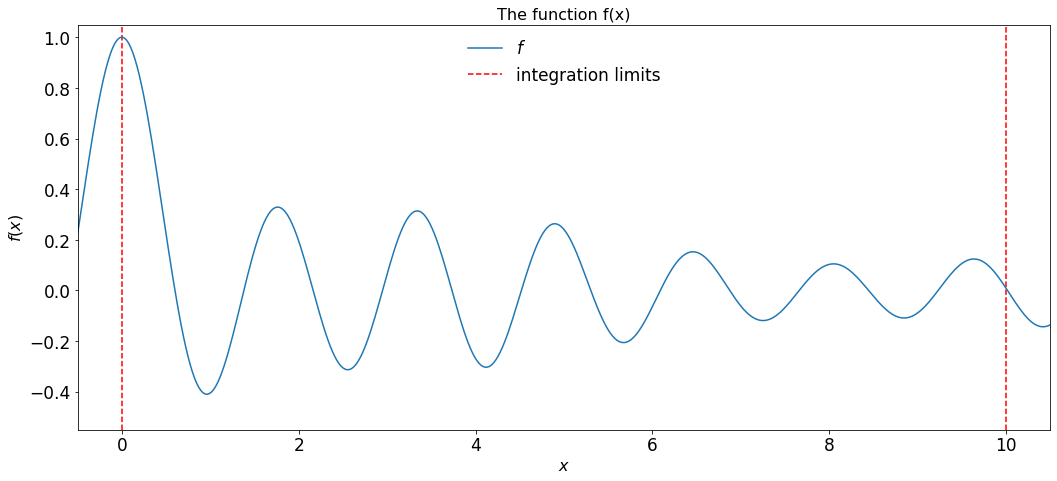

In [50]:
# Here we define and plot the functio f(x) that is to be integrated
print(r"Here we define and plot the function f that is to be integrated")
def f(x):
    return np.exp(special.jv(3,x)) * special.jv(0,4*x)
a   = -0.5
b   = 12

fig, ax = plt.subplots(1,1, figsize=(15, 7))

ax.set_xlim([-0.5, 10.5])
ax.set_ylim([-0.55, 1.05])
ax.set_ylabel(r"$f(x)$")
ax.set_xlabel(r"$x$")
ax.title.set_text(r"The function f(x)")
ax.vlines(0,  -10, 10, color='r', linestyle='dashed', label='integration limits')
ax.vlines(10, -10, 10, color='r', linestyle='dashed')
#
x   = np.arange(a,b,b/500)
ax.plot(x, f(x), label=r"$f$")
ax.legend(frameon=False, loc='upper center')
fig.tight_layout()
fig.savefig('special.png')
fig.show()

The integated function should look like this:
    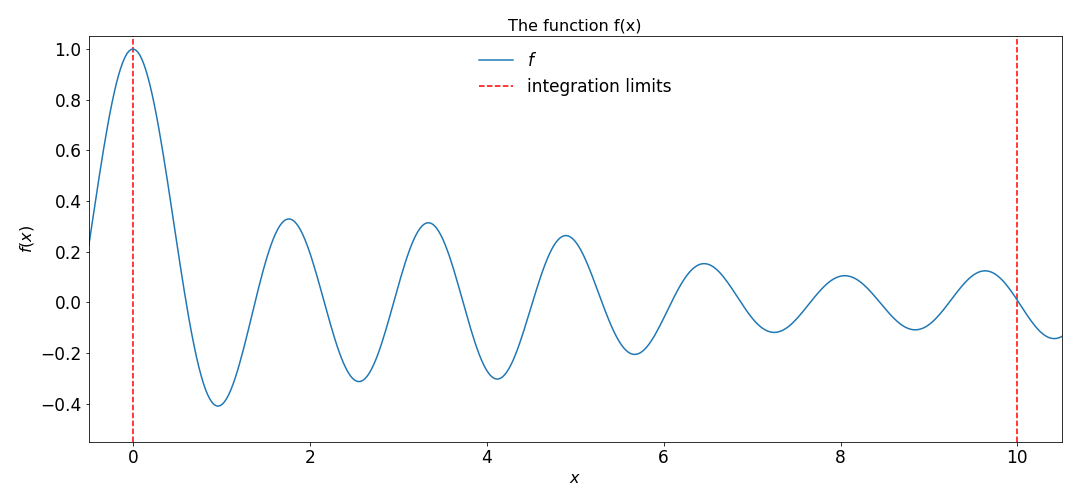
    
    
The box to enter your answer should appear below. If not, run the hiudden cell below to make it appear.

In [10]:
import mywidgets
int_test = mywidgets.myFloatBox('integration','q10','Integral = ',r'Result of $\int_0^{10}\,f(x)\,dx$. Specify the answer to 7 significant digits')
int_test.getWidget()

In [52]:
# Use this cell to calculate your answer

### BEGIN SOLUTION ###
Ns = np.arange(2, 10, 1)
previous = 0
for N in Ns:
    Nint     = 2**N
    ans      = Simpson(f,0,10,Nint)
    diff     = (ans-previous)/ans
    previous = ans
    info     = r"Number of intervals = 2^{0:d}, integral = {1:1.9f}, rel diff = {2:1.4E}".format(N, ans, diff)
    print(info)
### END SOLUTION ###

Number of intervals = 2^2, integral = 0.000315404, rel diff = 1.0000E+00
Number of intervals = 2^3, integral = -0.034253139, rel diff = 1.0092E+00
Number of intervals = 2^4, integral = 0.283153440, rel diff = 1.1210E+00
Number of intervals = 2^5, integral = 0.284062972, rel diff = 3.2019E-03
Number of intervals = 2^6, integral = 0.283555860, rel diff = -1.7884E-03
Number of intervals = 2^7, integral = 0.283528505, rel diff = -9.6479E-05
Number of intervals = 2^8, integral = 0.283526855, rel diff = -5.8212E-06
Number of intervals = 2^9, integral = 0.283526752, rel diff = -3.6067E-07


In [53]:
### BEGIN HIDDEN TESTS
answer   = 0.2835267523610387                   # correct answer
reply    = int_test.widgets[0].value            # student's answer
accuracy = np.abs(reply-answer)/answer * 1e6    # relative error
# print(reply, answer, accuracy)
assert np.isclose(accuracy,0,atol=1)
### END HIDDEN TESTS

AssertionError: 

# Part 3: Numerical differentiation

We will experiment with two python routines to obtain numerical derivatives. One uses numpy.gradient, the other fits the function with a spline and then evaluates the analytic derivatove of the spline.

The next cell illustrates their usage.


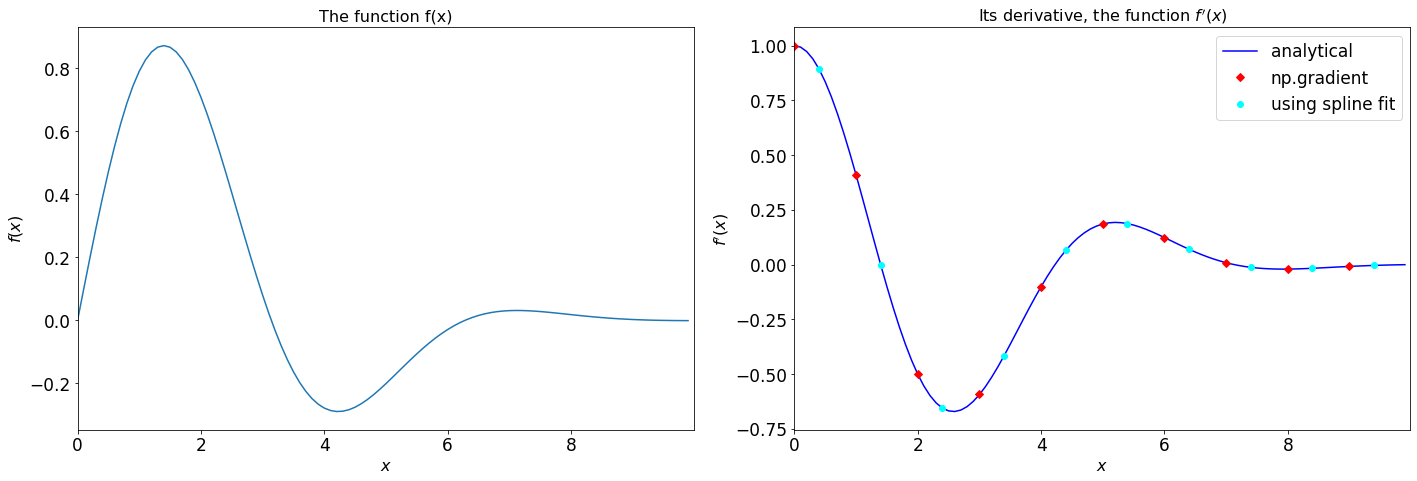

In [55]:
# Example of numerical differentiation. Here we use a function with a known derivative - as a test

# The function f(x)
def f(x):
    return np.exp(-(x/4)**2) * np.sin(x)

# Its analytical derivative
def dfx(x):
    return (-2*x/4**2 * np.sin(x) + np.cos(x)) * np.exp(-(x/4)**2)

# values of x
x = np.arange(0, 10, 0.1)

# first method: using np.gradient
vals  = f(x)
dfdx1 = np.gradient(vals, x)

# second method: using spline fitting
from scipy.interpolate import UnivariateSpline         # import the scipy routine
spl            = UnivariateSpline(x, vals, k=4, s=0)   # create spline fit
dfdx2_func     = spl.derivative(n=1)                   # create the first derivative of the spline
dfdx2          = dfdx2_func(x)                         #    and evaluate it at the x-values t

fig, ax = plt.subplots(1, 2, figsize=(20, 7))



ax[0].plot(x, f(x))

ax[0].set_xlim([0, 9.99])
ax[0].set_ylabel(r"$f(x)$")
ax[0].set_xlabel(r"$x$")
ax[0].title.set_text(r"The function f(x)")

ax[1].set_xlim([0, 9.99])
ax[1].plot(x, dfx(x), color='blue', label='analytical')
#
ax[1].plot(x[0:-1:10], dfdx1[0:-1:10], 'D', color='red', label='np.gradient')

#
ax[1].plot(x[4:-1:10], dfdx2[4:-1:10], 'o', color='cyan', label='using spline fit')

ax[1].set_ylabel(r"$f'(x)$")
ax[1].set_xlabel(r"$x$")
ax[1].legend()
ax[1].title.set_text(r"Its derivative, the function $f'(x)$")
fig.tight_layout()
fig.show()

## Play area: Convergence rates

We compare the convergence rates of the integrators.

This part is not marked, it is only a place to play. In the following cells we implement higher order integration routines. We use these to compute the numerical integral of some functions, varying the number of segments. This allows you to contrast the rate of convergence of the schemes.

Run the cells below. Can you provide a rule of thumb to the question: ** does the functional shape determine which integrator gives the most accurate answer for a given number of function evaluations**?

You need to set `do_test` to True for running this test, for example by running the last cell of this assignment before running the cells below here. Do make sure that `do_test` is False again before submitting the notebook.

In [56]:
# make sure that do_test is False before submitting or validating the notebook
# to tun the test, set do_test = True.
print(do_Test)

False


In [57]:
# Define third, fourth and fifth-order integrators
from itertools import cycle

def i3(f,xmin,xmax,Nin):
    N=Nin-(Nin%4)
    xs=np.linspace(xmin,xmax,N+1)
    dx=(xmax-xmin)/float(N)
    fs=f(xs)
    c=cycle([14,32,12,32])
    l=list(next(c) for i in range(N))
    l.append(7)
    l[0]=7
    coeffs=np.array(l)
    return dx*sum(fs*coeffs)*2.0/45.0

def i4(f,xmin,xmax,Nin):
    N=Nin-(Nin%5)
    xs=np.linspace(xmin,xmax,N+1)
    dx=(xmax-xmin)/float(N)
    fs=f(xs)
    c=cycle([38,75,50,50,75])
    l=list(next(c) for i in range(N))
    l.append(19)
    l[0]=19
    coeffs=np.array(l)
    return dx*sum(fs*coeffs)*5.0/288.0
def i5(f,xmin,xmax,Nin):
    N=Nin-(Nin%6)
    xs=np.linspace(xmin,xmax,N+1)
    dx=(xmax-xmin)/float(N)
    fs=f(xs)
    c=cycle([82,216,27,272,27,216])
    l=list(next(c) for i in range(N))
    l.append(41)
    l[0]=41
    coeffs=np.array(l)
    return dx*sum(fs*coeffs)*1.0/140.0

In [58]:
# for each method, run the integrator for a range of step sizes, and compute the error
# make a plot contasting the convergence with increasing number of steps, N
methods=[
    (NCintegrate,'NC'),
    (Trapezoidal,'Trap'),
    (Simpson,'Simpson'),
    (i3,'cubic'),
    (i4,'quartic'),
    (i5,'5th order')
]

def makeErrorPlot(f,xmin,xmax,trueValue):
    '''This function plots the error as a function of the number of subdivisions for the 
       integration methods defined above.'''    
    def error(IntFn,N):
        est=IntFn(f,xmin,xmax,N)
        return abs(est-trueValue)

    Ns=[4**n for n in range(3,12)]
    for (fn,label) in methods:    
        errors=[error(fn,N) for N in Ns]
        plt.plot(Ns,errors,label=label)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel(r'$N$')
    plt.ylabel('error')
    plt.legend()

In [59]:
# f(x) = x^7: higher-order methods converge much faster
def xto7(x):
    return x**7

if do_test:
    makeErrorPlot(xto7,0.0,1.0,0.125)

NameError: name 'do_test' is not defined

In [ ]:
# f(x)=2-4x: not surprisingly, higher order schemes all converge at the same rate for this linear function
def linear(x):
    return 2.0-4.0*x 
if do_test:
    makeErrorPlot(linear,0.0,1.0,0)

In [ ]:
# f(x) = 2-4x+3x^2: again, once method is of high enough order, all converge at the same rate. Note the onset of round-off errors set
def quadratic(x):
    return 2.0-4.0*x+3.0*x**2
if do_test:
    makeErrorPlot(quadratic,0.0,1.0,1.0)

In [ ]:
def discontinous(x):
    return x*np.sin(x)/abs(np.sin(x))

if do_test:
    xs=np.linspace(1,1+10*np.pi,2000)
    plt.plot(xs,discontinous(xs))

In [ ]:
# If the function is discontinuous, going to high-orders does not improve convergence
if do_test:
    makeErrorPlot(discontinous,1,1+10*np.pi,5*(2*np.pi-np.pi**2))

In [ ]:
def complicated(x):
    return np.sqrt(x+np.cos(5*x)**2)/(1+(x-0.3)**2)

if do_test:
    makeErrorPlot(complicated,0.0,1.0,0.85683203415819954517417626994)

In [ ]:
def exponential(x):
    return np.exp(x)

if do_test:
    makeErrorPlot(exponential,0.0,1.0,np.exp(1)-1)

In [ ]:
def exponential2(x):
    return np.exp(1.0/x)/(x**2)
if do_test:
    makeErrorPlot(exponential2,1.0,4.0,-np.exp(1.0/4.0)+np.exp(1.0))

In [ ]:
def sqrt1(x):
    return np.sqrt(1.0-x**2)
if do_test:
    makeErrorPlot(sqrt1,0.0,1.0,np.pi/4.0)

In [ ]:
# run this cell below the cells above to examine the outcome of those cells.
do_test = True
